# Memprediksi Emisi Gas CO2 beberapa Negara diseluruh Dunia 
### Projek machine learning
----------------------------------------

## Tahap 2: Exploratory Data Analysis
-----------------------------------------

##### **Daftar Isi pada Notebook**
1. Background - Latar belakang pembuatan projek dan sumber data yang digunakan hingga tujuan penelitian
2. Notebook Setup - mengimport package dan data
3. Overview data
4. Feature/Variabel/Kolom satuan
5. Hipotesis
6. Feature Engineering
   Feature Engineering mengacu pada proses dari domain knowledge untuk memilih dan mengubah variabel yang paling relevan dengan data mentah saat membuat model prediksi dengan menggunakan machine learning, statistik maupun pemodelan lainnya[[1]](https://www.heavy.ai/technical-glossary/feature-engineering).
    - features overviw
    - Memilih feature yang penting
6. Data Visualisasi
7. Create plots
    - Mengetahui korelasi dari heatmaps
    - Histogram
    - Mendeteksi outlier dan menghandle outlier
8. Kesimpulan
--------------------------------------------------------------------------

In [15]:
#Mengimport package yang akan digunakan
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection as fs

In [16]:
#import cleaned_data into pandas DataFrame
data = pd.read_csv("../Data/cleaned_data.csv")

**Overview Data**

In [17]:
B, K = data.shape #tipe data berbentuk tuple 
print(f"Ukuran dataset yang kita miliki terdiri atas {B} Baris dan {K} Kolom")

Ukuran dataset yang kita miliki terdiri atas 1700 Baris dan 18 Kolom


In [18]:
print("Tipe data pada masing-masing kolom:")
data.dtypes

Tipe data pada masing-masing kolom:


country                 object
year                     int64
cereal_yield           float64
fdi_%GDP               float64
energy_per_GDP         float64
energy_per_capt        float64
co2_total              float64
co2_per_capt           float64
co2_per_unit           float64
popul_agglomeration    float64
protected_areas        float64
gdp                    float64
gni_capt               float64
under_5_mortality      float64
popul_growth           float64
Population             float64
urb_popul_growth       float64
urb_popul              float64
dtype: object

In [19]:
#menampilkan 10 data pertama pada dataset
data.head(10)

,country,year,cereal_yield,fdi_%GDP,energy_per_GDP,energy_per_capt,co2_total,co2_per_capt,co2_per_unit,popul_agglomeration,protected_areas,gdp,gni_capt,under_5_mortality,popul_growth,Population,urb_popul_growth,urb_popul
0,Angola,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,1.065352e+07,6.687032,4.099473e+06
1,United Arab Emirates,1991,1594.0,0.076475,245.977706,12262.388130,57010.849,29.851550,598.807980,26.377204,0.266886,3.391964e+10,19340.0,20.5,5.442852,1.909812e+06,5.265704,1.507988e+06
2,Argentina,1991,2666.1,1.285579,173.122857,1434.960601,117021.304,3.536073,426.614517,39.119646,4.772468,1.897200e+11,3960.0,25.8,1.372593,3.309358e+07,1.762636,2.890393e+07
3,Australia,1991,1603.3,1.306912,208.686644,4926.727783,281530.258,16.288490,689.948873,60.356798,7.915273,3.299655e+11,18380.0,8.6,1.274577,1.728400e+07,1.438378,1.478473e+07
4,Austria,1991,5463.0,0.209142,128.939160,3381.073790,65888.656,8.448456,322.186648,19.746121,20.991143,1.721664e+11,21200.0,8.9,1.134999,7.798899e+06,1.134999,5.131676e+06
5,Bangladesh,1991,2585.7,0.004491,154.496130,116.511476,15940.449,0.147913,196.135682,9.443704,1.537922,3.095744e+10,300.0,137.9,2.359199,1.077687e+08,4.260207,2.174773e+07
6,Bulgaria,1991,3990.0,0.510803,367.387480,2560.054449,59706.094,6.916832,992.618530,13.789261,2.416870,1.094355e+10,1620.0,22.3,-0.991363,8.632000e+06,-0.570562,5.755818e+06
7,Bolivia,1991,1358.0,0.973189,124.898118,394.957523,5779.192,0.848156,268.213775,25.655982,8.583622,5.343259e+09,760.0,116.7,2.306643,6.813834e+06,3.664292,3.840277e+06
8,Brazil,1991,1850.6,0.270783,131.112804,939.256647,219330.604,1.441571,201.231977,35.137914,10.994541,4.073378e+11,2870.0,57.1,1.654581,1.521469e+08,2.453520,1.147188e+08
9,Canada,1991,2580.7,0.480500,283.945526,7388.563674,449053.486,15.939889,612.576462,39.968292,6.016160,5.982081e+11,20420.0,8.0,1.360506,2.817168e+07,1.647301,2.164149e+07


In [20]:
#melakukan analisis statistika deskriptif menggunakan keseluruhan data
data.describe()

,year,cereal_yield,fdi_%GDP,energy_per_GDP,energy_per_capt,co2_total,co2_per_capt,co2_per_unit,popul_agglomeration,protected_areas,gdp,gni_capt,under_5_mortality,popul_growth,Population,urb_popul_growth,urb_popul
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1.700000e+03
mean,1999.570588,3013.317581,2.948940,249.822736,1968.979736,9.793999e+05,4.676663,482.303784,21.480126,12.201789,1.058568e+12,7898.668664,51.971955,1.451313,3.060142e+08,2.252231,1.347903e+08
std,5.143070,1796.206082,3.949722,186.195019,1959.419972,3.235692e+06,4.906273,392.192230,12.105158,9.116682,3.921323e+12,11592.516937,51.332162,1.129312,9.482329e+08,1.642009,4.145755e+08
min,1991.000000,175.700000,-15.027675,66.335372,116.511476,7.077310e+02,0.029411,45.552592,3.526316,0.000000,9.826326e+08,80.000000,3.200000,-2.397174,1.909812e+06,-2.757210,1.151309e+06
25%,1995.000000,1683.364736,0.834105,136.320490,542.882788,1.462125e+04,0.922769,257.139562,12.383953,5.839844,1.636221e+10,780.000000,10.000000,0.630306,9.973065e+06,0.925308,5.469794e+06
50%,2000.000000,2584.800000,1.993220,197.624918,1089.225939,7.728386e+04,3.093346,368.415567,18.525960,10.293791,9.882942e+10,2150.770301,32.350000,1.519890,2.689207e+07,2.315122,1.423239e+07
75%,2004.000000,3933.400000,3.702149,286.474936,2893.996077,3.708446e+05,7.441195,586.972993,28.988324,16.599298,4.122600e+11,9205.000000,79.925741,2.276853,8.234386e+07,3.364747,4.835246e+07
max,2008.000000,8410.800000,51.373951,1383.380011,12607.839262,3.064936e+07,37.106499,3343.454250,60.505780,53.749825,5.580488e+13,58620.000000,239.100000,11.180657,6.610030e+09,12.829046,3.264974e+09


**Hipotesis**

Pada Dataset Climate Chnage World Bank Group terdapat beberapa fitur yang mungkin dapat mempengaruhi perubahan iklim di berbagai negara. Namun, untuk projek ini akan mengasumsikan bahwa Emisi CO2 menjadi variabel dependen dan akan menginvestigasi fitur/variabel apakah yang mempengaruhi emisi co2 diberbagai negara.

**Featrure Engineering**

Variabel yang mewakili emisi CO2 dan penggunaan energi berdasarkan nilai yang berbeda:
1. per kapita:
    - energy_per_capt
    - co2_per_capt
2. per GDB:
    - energy_per_GDP
    - co2_per_unit
3. nilai total:
    - co2_total
    
Namun, untuk energy total tidak ada dalam data. Maka, akan dilakukan penambahan kolom energy_total dengan mengalikan *energy_per_GDP* dengan *gdp* dan membaginya dengan 1000. Hal ini dilakukan karena penggunaan energi per unit GDP didefinisikan dengan kumpulan data sebagai penggunaan energi dalam kilogram setara dengan oil per $1000 dari GDP

In [21]:
#membuat kolom baru "energy_total"
data["energy_total"] = data["energy_per_GDP"]*data["gdp"]/1000

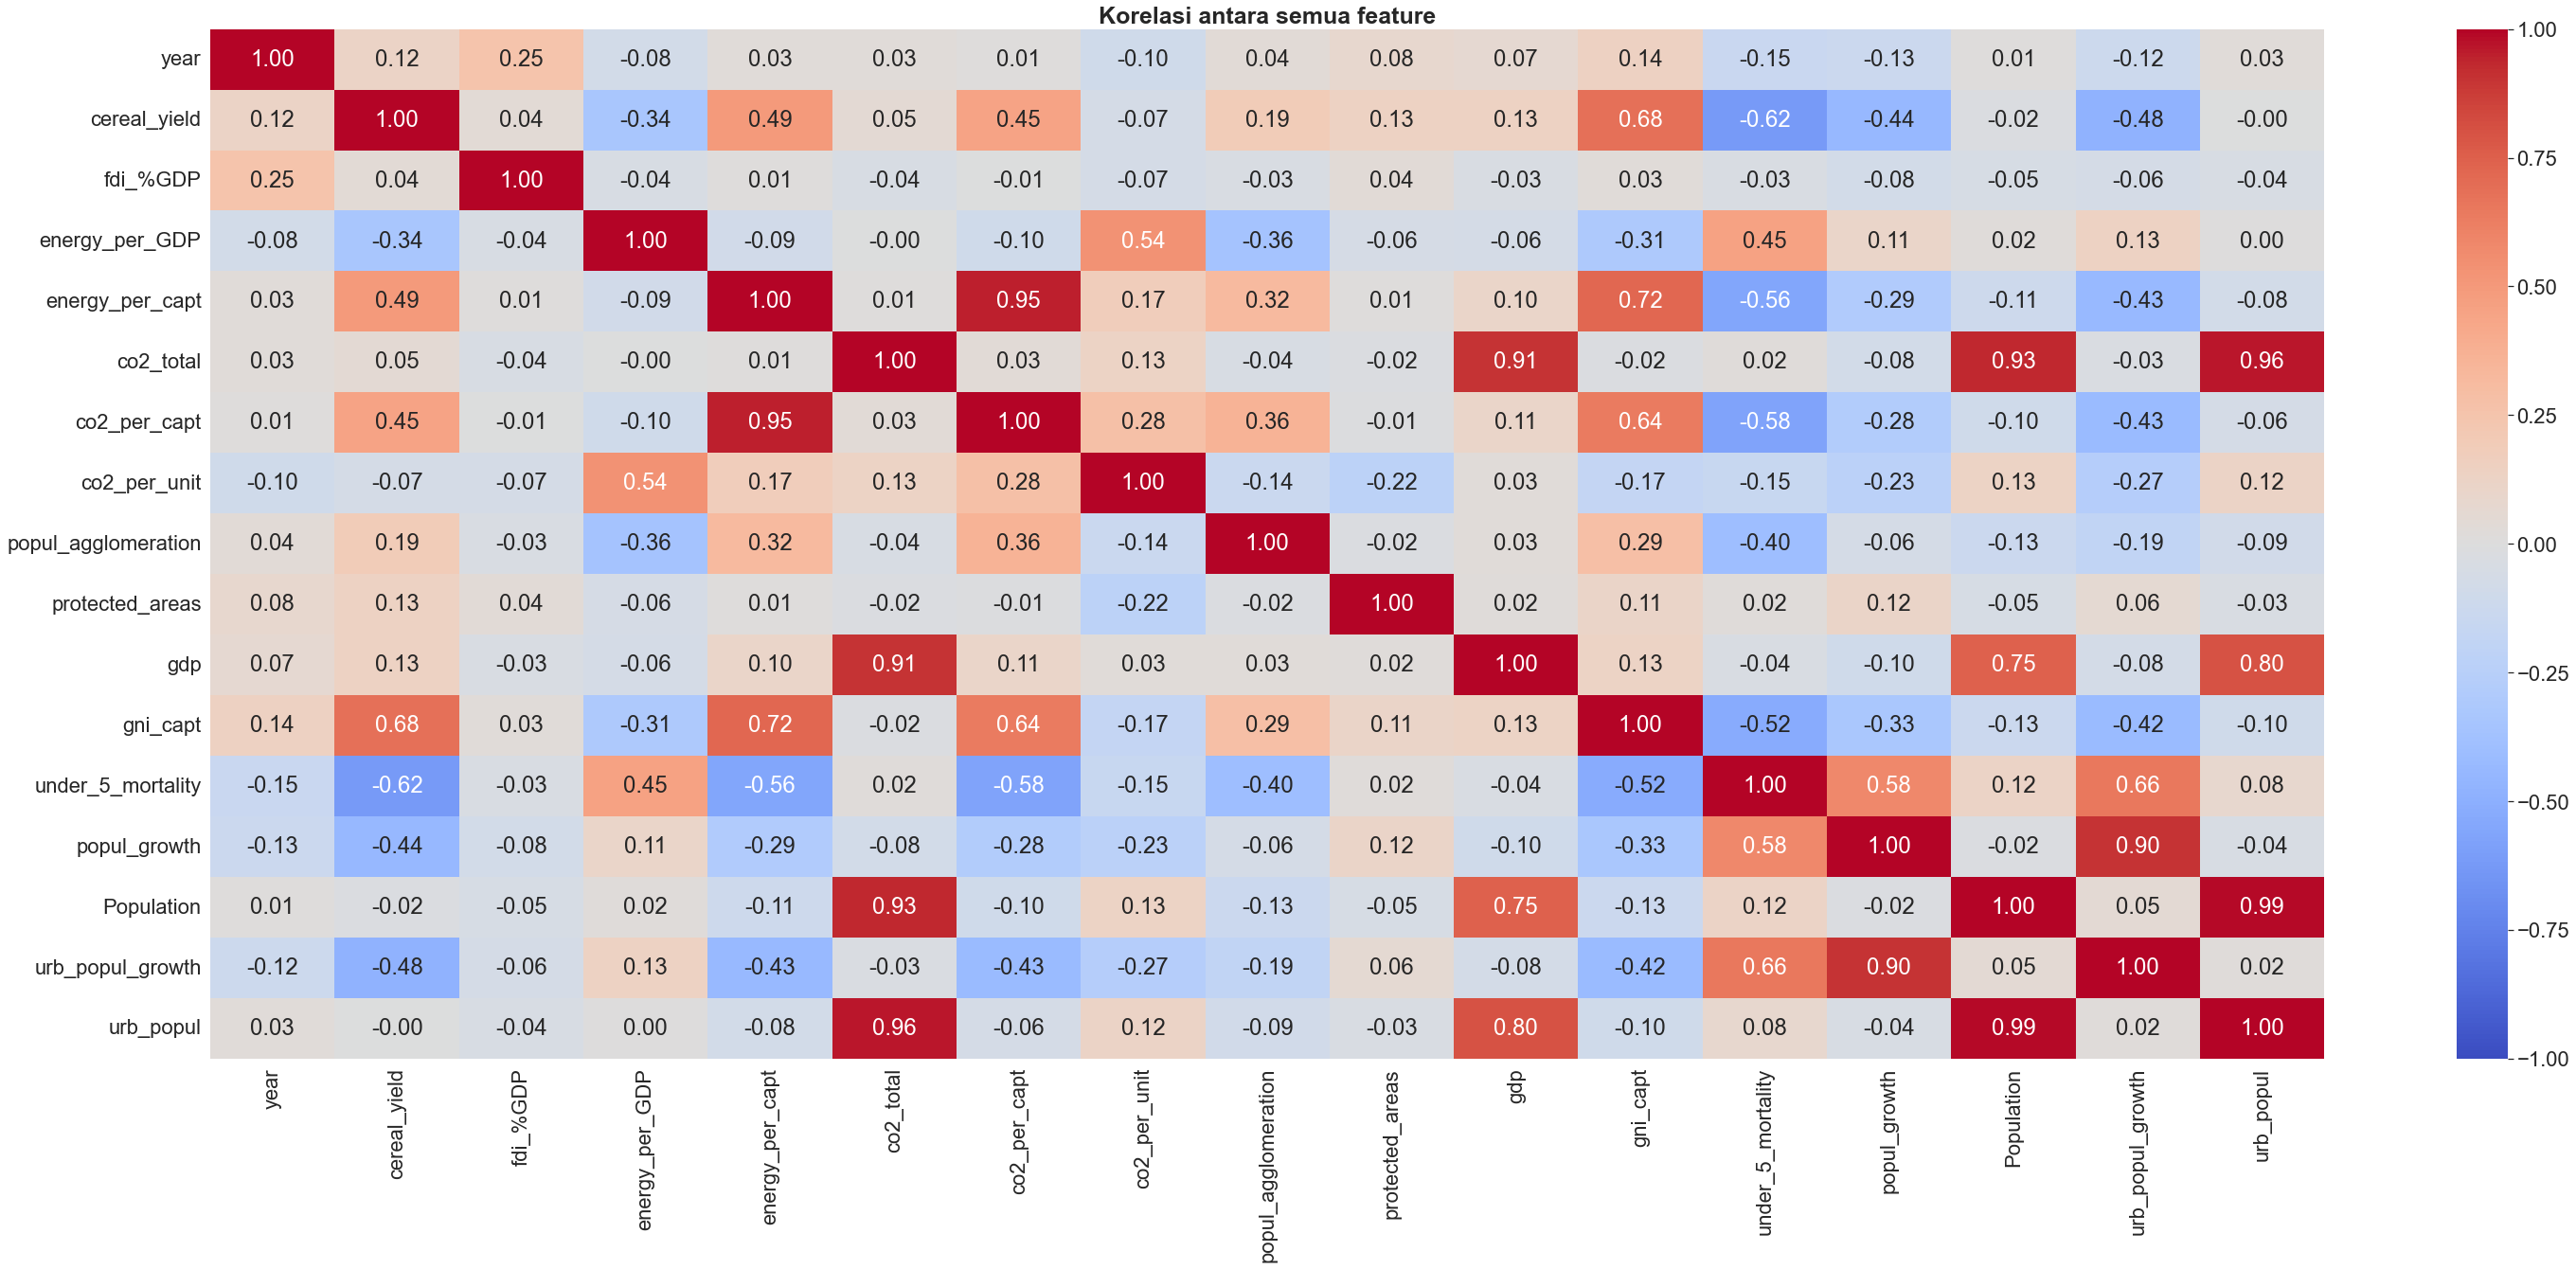

In [22]:
# select all features
all_features = data[[
                    "country","year","cereal_yield", "fdi_%GDP", "energy_per_GDP", "energy_per_capt",
                    "co2_total", "co2_per_capt", "co2_per_unit","popul_agglomeration", 
                    "protected_areas", "gdp","gni_capt", "under_5_mortality", 
                    "popul_growth", "Population", "urb_popul_growth","urb_popul"
                     ]]

# plot a correlation of all features
# correlation matrix
sns.set(font_scale=2)
f,ax=plt.subplots(figsize=(50,20))
sns.heatmap(all_features.corr(), annot=True, cmap='coolwarm', fmt = ".2f", center=0, vmin=-1, vmax=1)
plt.title('Korelasi antara semua feature', fontsize=25, weight='bold' )
plt.show()

sns.set(font_scale=1)

Saat membandingkan dependensi co2_total, co2_per_capt dan co2_per_gdp dengan fitur lain, co2_per_capt berkorelasi dengan jumlah variabel lain yang lebih banyak. Ini juga mewakili emisi CO2 secara independen dari ukuran populasi, membuatnya lebih representatif ketika menganalisis dan membandingkan emisi negara-negara dengan ukuran dan jumlah populasi yang berbeda.

Karena variabel yang dipilih dirujuk ke jumlah populasi, tidak masuk akal untuk mengambil variabel populasi (menunjukkan jumlah populasi) - ini juga dapat dilihat dari koefisien korelasi yang lemah.

Dengan mempertimbangkan hal ini, fitur populasi, en_per_gdp, energy_total, co2_per_gdp, co2_total akan dihapus dari analisis lebih lanjut:


In [23]:
labels_dictionary={
       "cereal_yield":'Cereal yield (kg per hectare)',
       "fdi_%GDP":'Foreign direct investment, net inflows (% of GDP)',
       "energy_per_capt":'Energy use per capita (kilograms of oil equivalent)',
       "co2_per_capt":'CO2 emissions per capita (metric tons)',
       "popul_agglomeration":'Population in urban agglomerations >1million (%)',
       "protected_areas":'Nationally terrestrial protected areas (% of total land area)',
       "gdp":'GDP ($)',
       "gni_capt":'GNI per capita (Atlas $)',
       "popul_growth":'Population growth (annual %)', 
       "urb_popul_growth":'Urban population growth (annual %)'
}

In [24]:
features = all_features[[
                    "country","cereal_yield", "fdi_%GDP", "gni_capt", "energy_per_capt",
                    "co2_per_capt","popul_agglomeration", "protected_areas", "gdp", 
                    "popul_growth", "urb_popul_growth"
                     ]]

In [25]:
features["country"].unique()

array(['Angola', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Bangladesh', 'Bulgaria', 'Bolivia', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Rep.', 'Colombia', 'Costa Rica', 'Germany', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt, Arab Rep.',
       'Euro area', 'Spain', 'Finland', 'France', 'United Kingdom',
       'Ghana', 'Greece', 'Guatemala', 'Honduras', 'Hungary', 'Indonesia',
       'India', 'Ireland', 'Israel', 'Italy', 'Jordan', 'Japan', 'Kenya',
       'Korea, Rep.', 'Latin America & Caribbean', 'Low income',
       'Lower middle income', 'Low & middle income', 'Morocco', 'Mexico',
       'Middle income', 'Middle East & North Africa', 'Mozambique',
       'Malaysia', 'Nigeria', 'Netherlands', 'New Zealand', 'Pakistan',
       'Panama', 'Peru', 'Philippines', 'Portugal', 'Paraguay', 'Romania',
       'South Asia', 'Saudi Arabia', 'Sudan', 'Senegal', 'El Salvador',
     

In [26]:
country_choose= [
        'Angola', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Bangladesh', 'Bulgaria', 'Bolivia', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Rep.', 'Colombia', 'Costa Rica', 'Germany', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt, Arab Rep.',
       'Euro area', 'Spain', 'Finland', 'France', 'United Kingdom',
       'Ghana', 'Greece', 'Guatemala', 'Honduras', 'Hungary', 'Indonesia',
       'India', 'Ireland', 'Israel', 'Italy', 'Jordan', 'Japan', 'Kenya'
       ]

In [27]:
features_chosen = features[features['country'].isin(country_choose)]

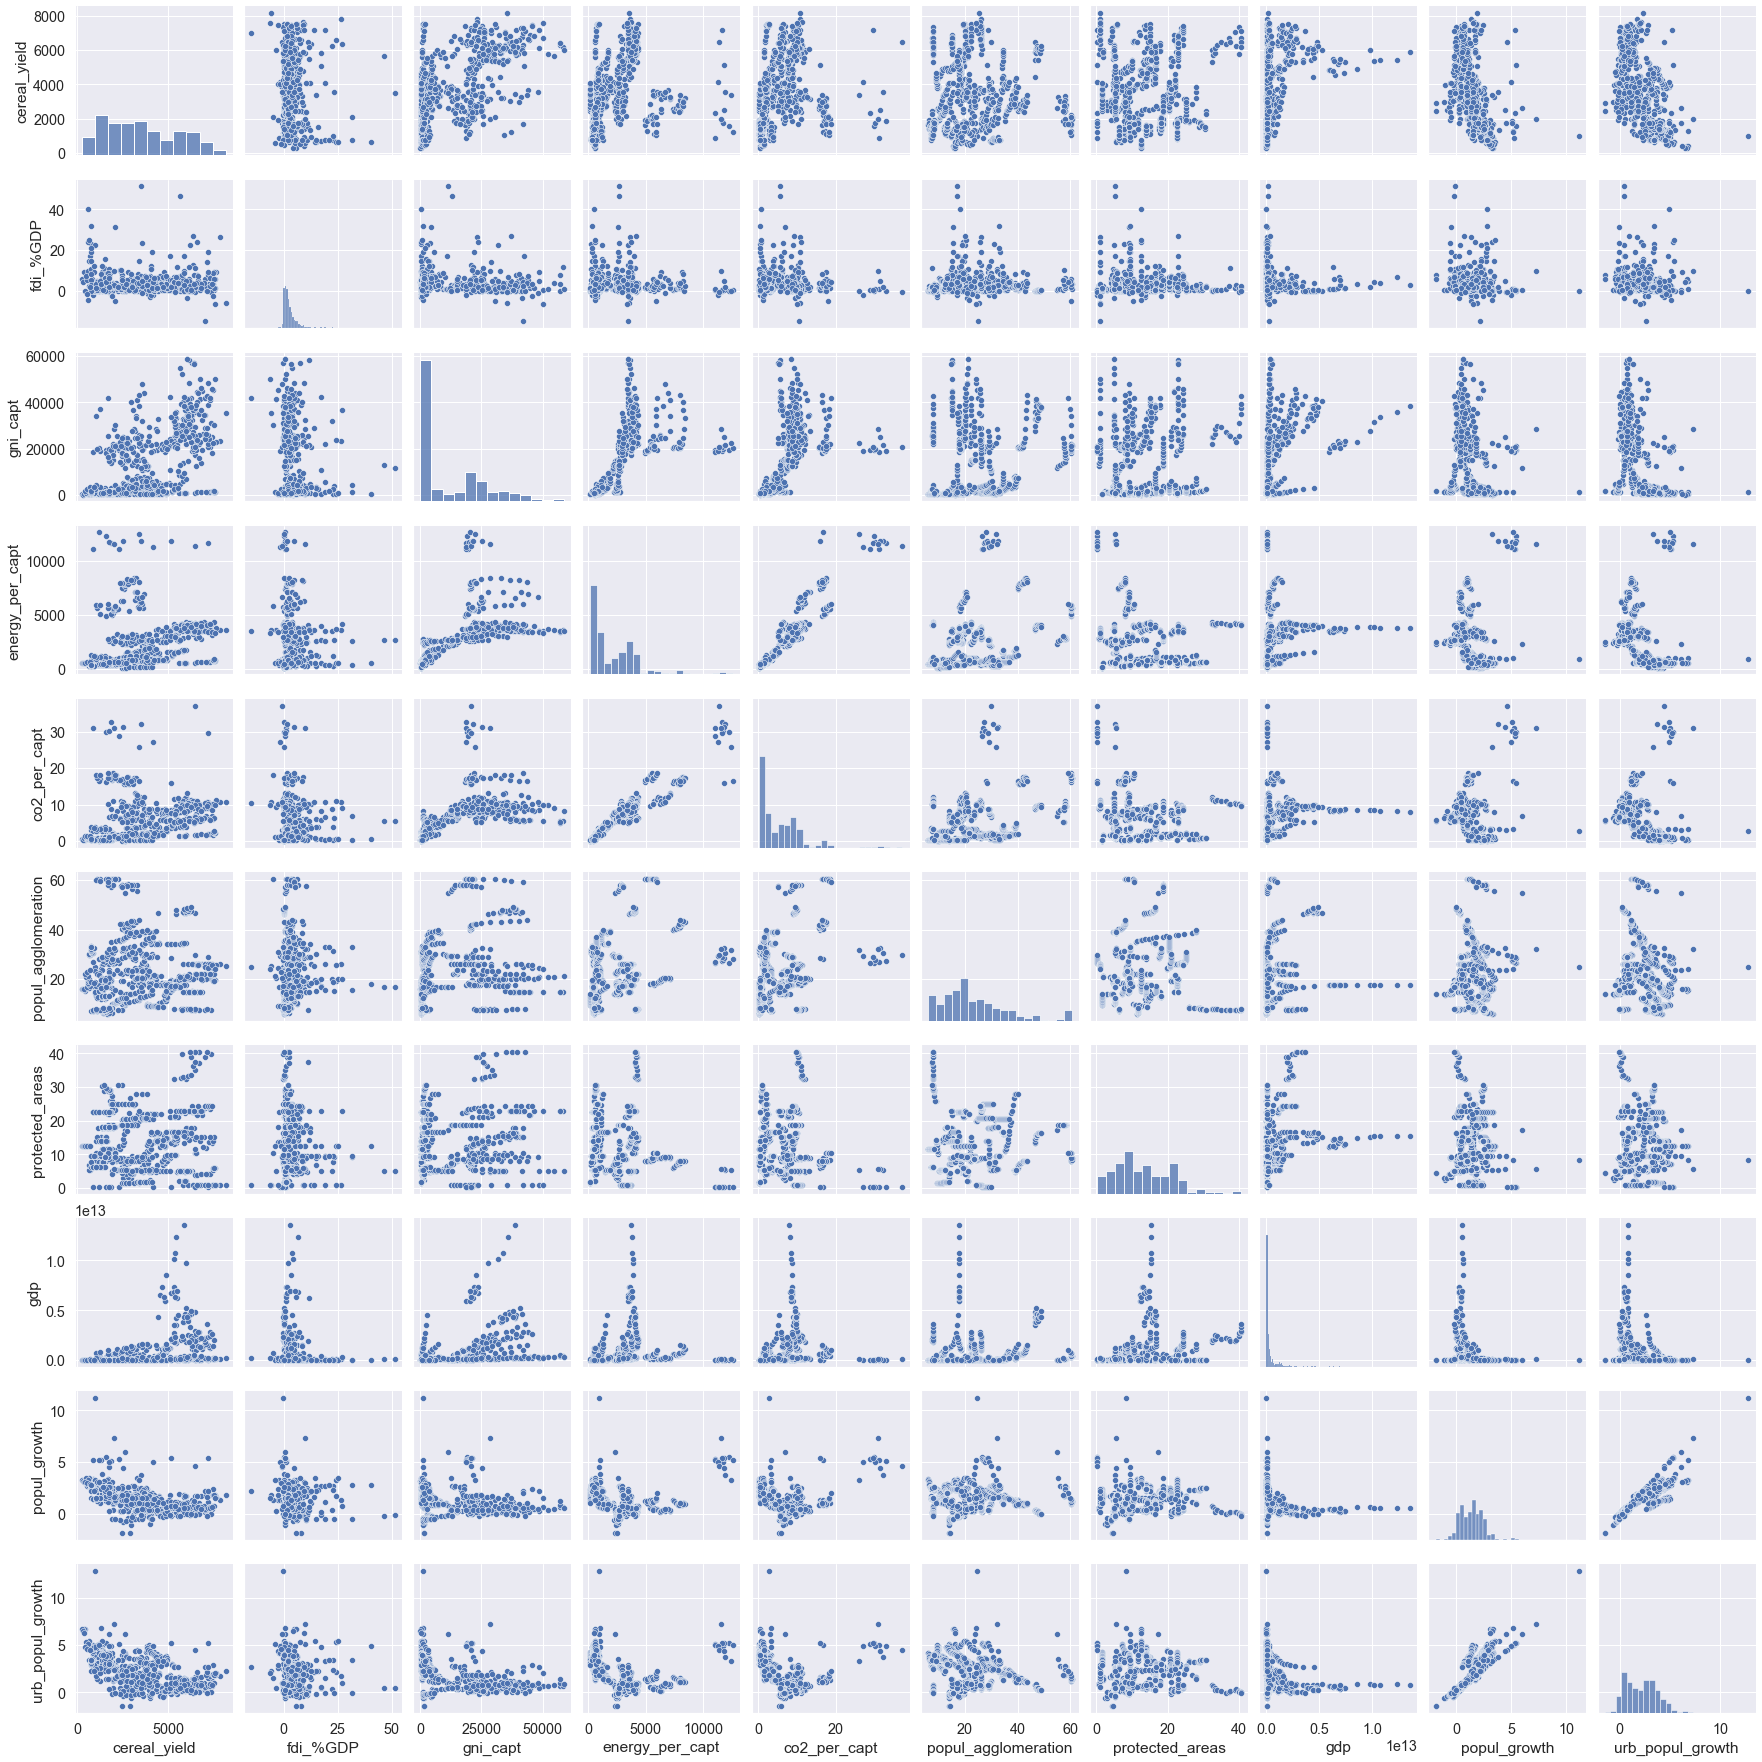

In [28]:
sns.set(font_scale=1.3)
sns.pairplot(features_chosen)

**Menghandle Outlier**

Jika kita lihat pairplot diatas, pada masing-masing variabel terdapat outlier. Oleh karena itu, kita akan menghandle missing value dengan Interquartile Range

In [29]:
data1=data

In [30]:
# Trimming : IQR
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
print(IQR) # Menghitung jumlah data setelah di trim dengan IQR

year                   9.000000e+00
cereal_yield           2.250035e+03
fdi_%GDP               2.868043e+00
energy_per_GDP         1.501544e+02
energy_per_capt        2.351113e+03
co2_total              3.562234e+05
co2_per_capt           6.518426e+00
co2_per_unit           3.298334e+02
popul_agglomeration    1.660437e+01
protected_areas        1.075945e+01
gdp                    3.958978e+11
gni_capt               8.425000e+03
under_5_mortality      6.992574e+01
popul_growth           1.646547e+00
Population             7.237080e+07
urb_popul_growth       2.439439e+00
urb_popul              4.288267e+07
energy_total           7.850548e+10
dtype: float64


In [31]:
data_without_outlier = data1[~((data1<(Q1-1.5*IQR))|(data1>(Q3+1.5*IQR))).any(axis=1)]
data_without_outlier.shape # data setelah di cek outlier

c:\Users\Dewi\anaconda3\envs\learn\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(836, 19)

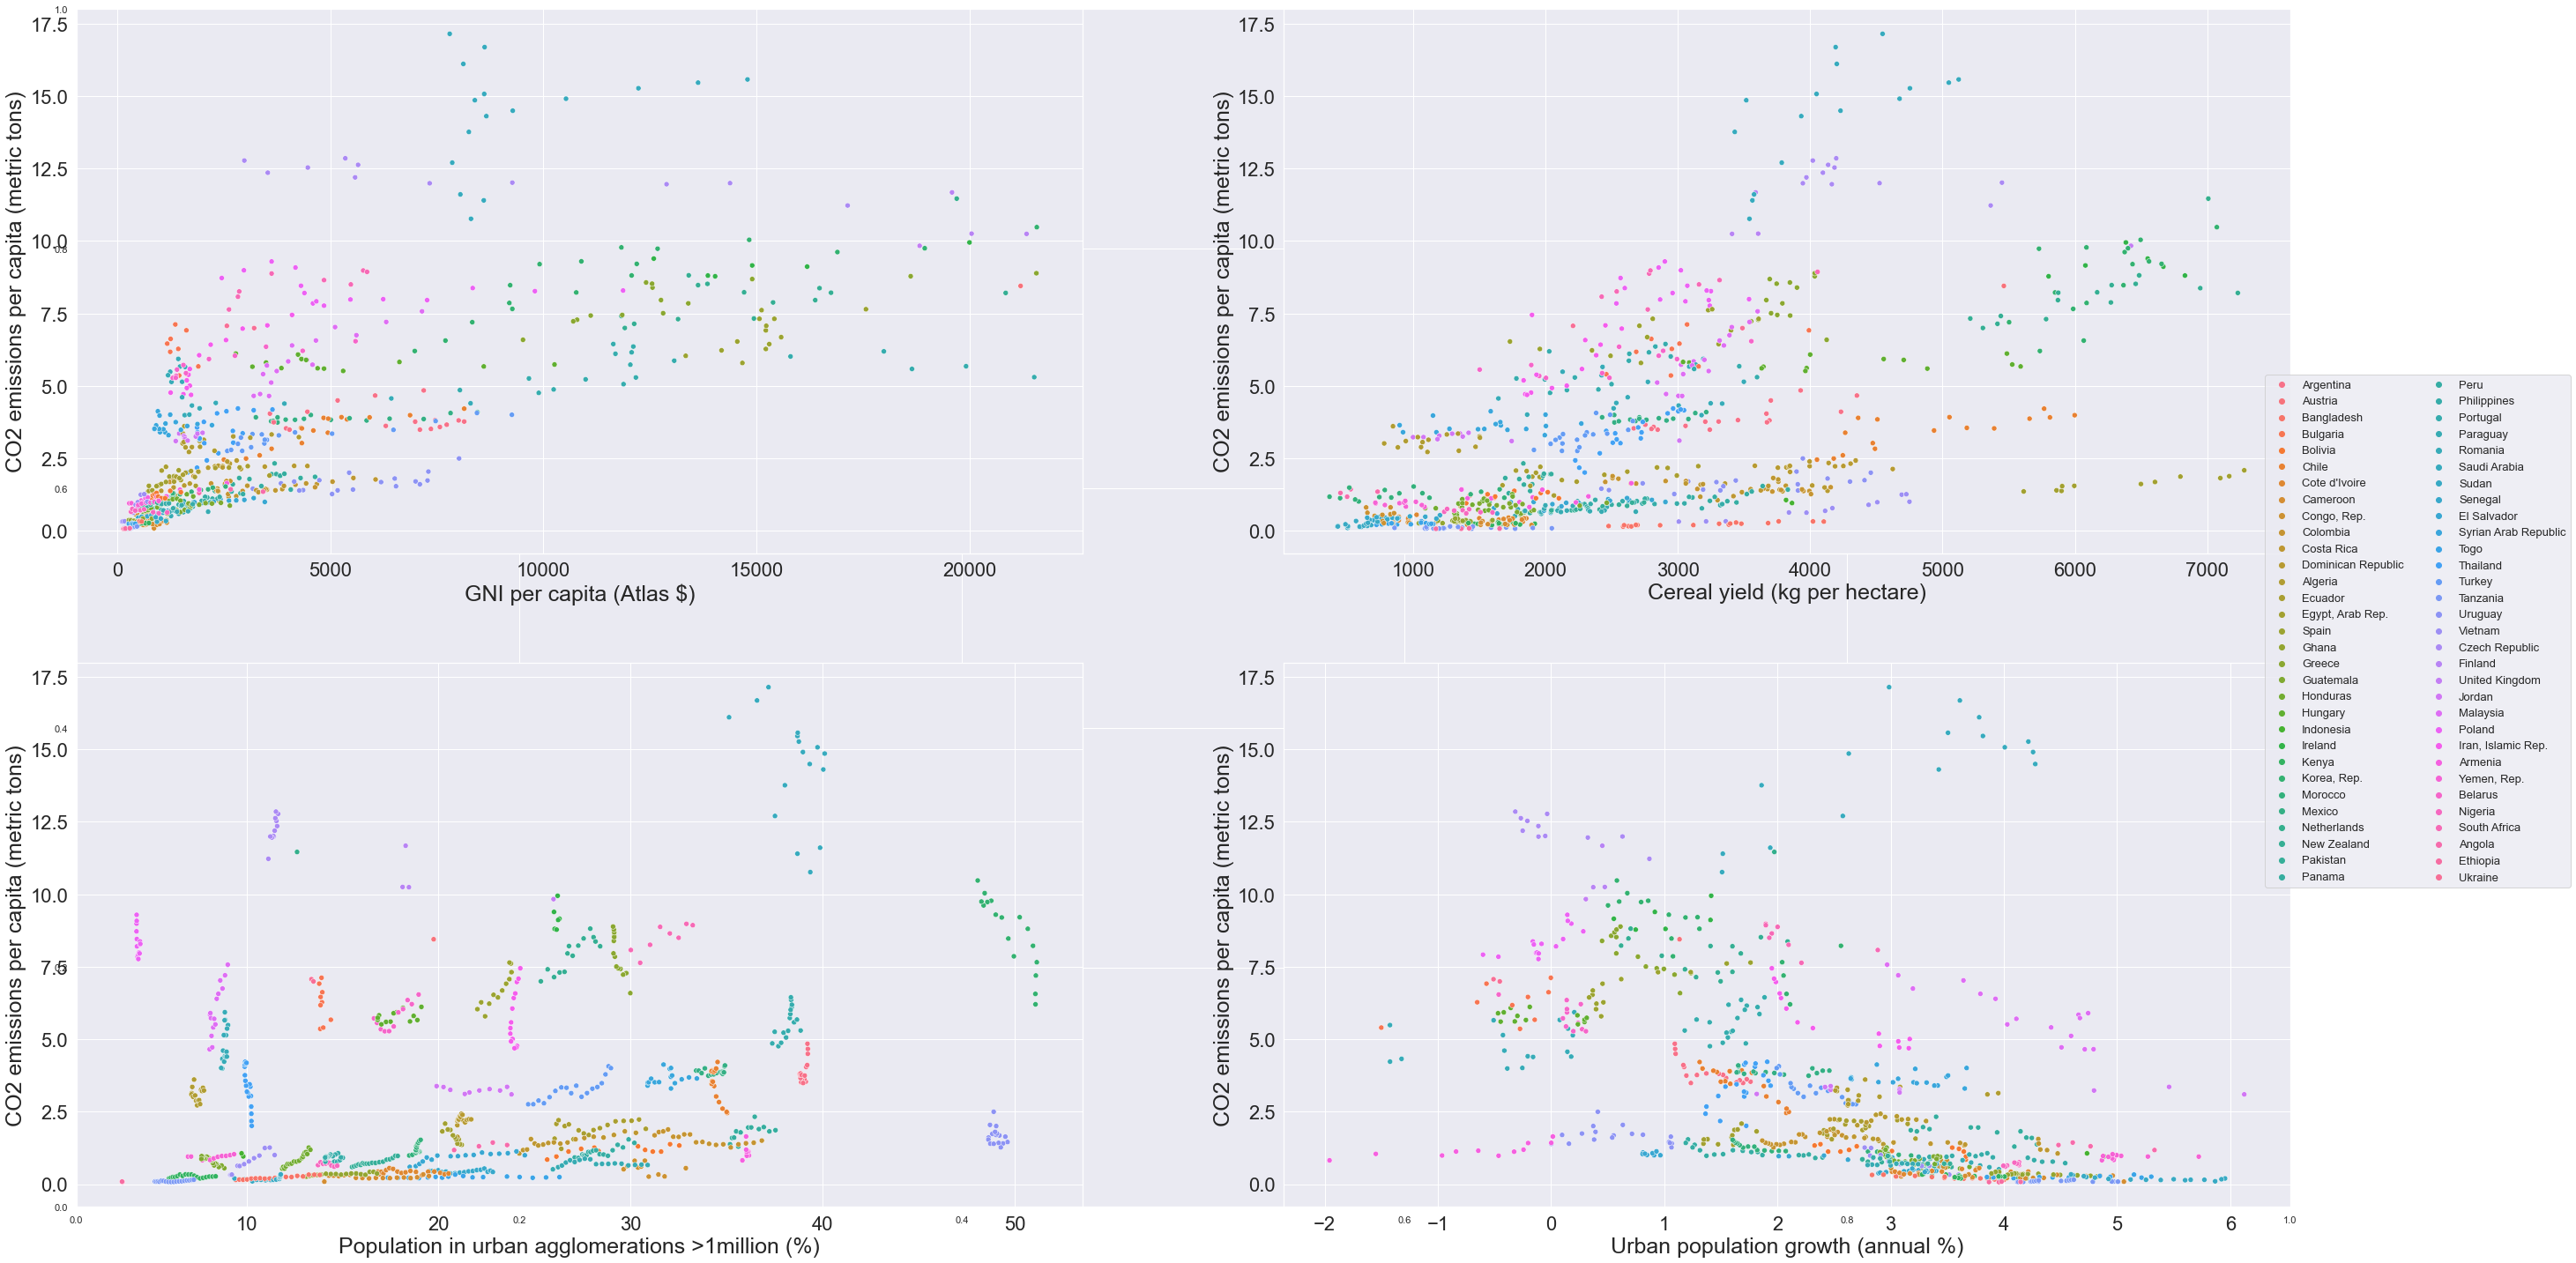

In [32]:
sns.set()

fig, ax = plt.subplots(figsize=(45,25))
ind = 1

sns.set_context("paper")
sns.set(color_codes=True, font_scale=2)

for [col, label] in [
                     ['gni_capt',labels_dictionary['gni_capt']], 
                     ['cereal_yield',labels_dictionary['cereal_yield']], 
                     ['popul_agglomeration',labels_dictionary['popul_agglomeration']], 
                     ['urb_popul_growth',labels_dictionary['urb_popul_growth']]
                     ]:
    ax = fig.add_subplot(2,2,ind)
    sns.scatterplot(ax=ax, x=col, y="co2_per_capt", data=data_without_outlier, hue="country", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel(labels_dictionary["co2_per_capt"], fontsize=25)
    ind += 1

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='center right', fontsize=13)
plt.show()

Text(77.39078085937498, 0.5, 'CO2 emissions per capita (metric tons)')

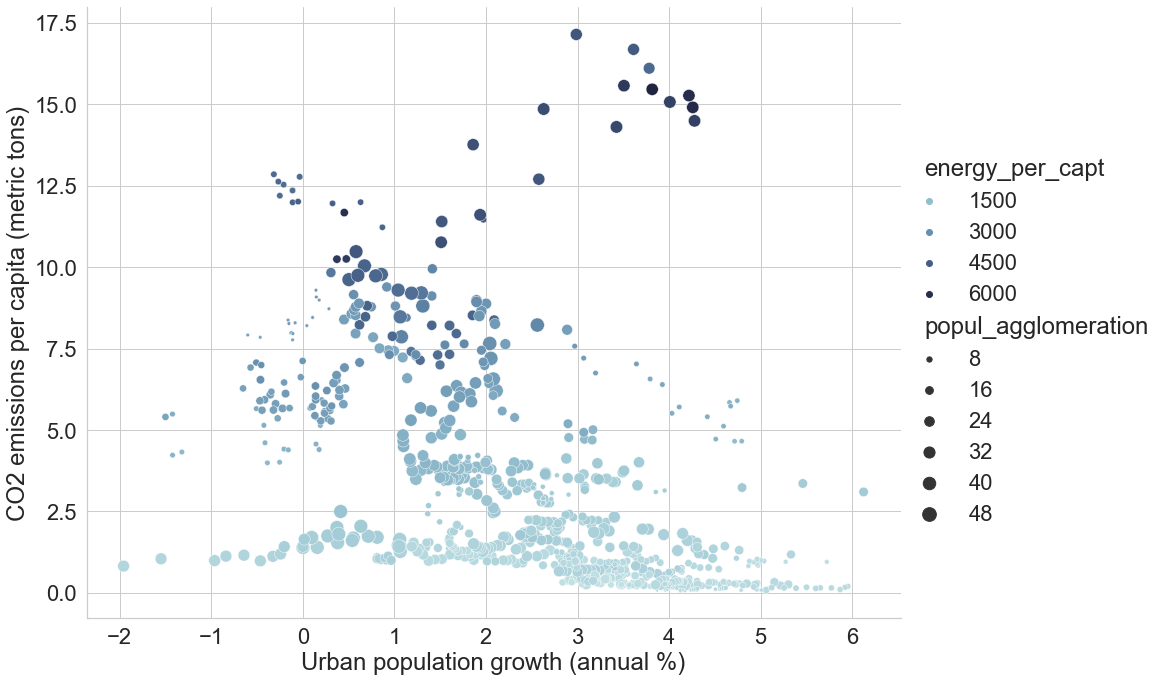

In [33]:
sns.set(style="whitegrid", font_scale=2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data_without_outlier,
    x="urb_popul_growth", y="co2_per_capt",
    hue="energy_per_capt", size="popul_agglomeration",
    palette=cmap, sizes=(10, 200),
    height=10, aspect= 4/3
)

g.ax.set_xlabel(labels_dictionary['urb_popul_growth'])
g.ax.set_ylabel(labels_dictionary['co2_per_capt'])

**Kesimpulan berdasarkan hasil visualisasi**

1. Saat membandingkan dependensi co2_total, co2_per_capt dan co2_per_gdp dengan fitur lain, co2_per_capt berkorelasi dengan jumlah variabel lain yang lebih banyak. Ini juga mewakili emisi CO2 secara independen dari ukuran populasi, membuatnya lebih representatif ketika menganalisis dan membandingkan emisi negara-negara dengan ukuran dan jumlah populasi yang berbeda. Karena variabel yang dipilih dirujuk ke jumlah populasi, tidak masuk akal untuk mengambil variabel populasi (menunjukkan jumlah populasi) - ini juga dapat dilihat dari koefisien korelasi yang lemah. 
2. Hasil visualisasi menggunakan pair plot mempermudah mengetahui outlier serta dapat mempermudah menangani outlier.

## Tahap 3: Prediction Using Random Forest
-----------------------------------------

**Random Forest**

**Definisi** : Random Forest merupakan model klasifikasi yang terdiri dari kumpulan pengklasifikasian pohon terstruktur  {h(x, Θk) k=1,
2, ….} dimana {Θ_k } merupakan vektor acak yang terdistribusi dan setiap pohon memberikan pengaruh untuk kelas yang di input x.[[3]](https://link.springer.com/article/10.1023/A:1010933404324)

Random Forest menghasilkan ansambel pohon keputusan. Untuk mencapai keragaman di antara pohon keputusan dasar, Breiman memilih pendekatan pengacakan yang bekerja dengan baik dengan bagging atau metode subruang acak [[3]](https://adiwijaya.staff.telkomuniversity.ac.id/files/2014/02/Random-Forest-Classifiers_A-Survey-and-Future.pdf)

Karena beberapa algoritma melibatkan tingkat keacakan tertentu, maka perlu memastikan reproduktifitas hasil pada setiap perintah yang dijalankan. Ini dilakukan dengan mengatur parameter random_state untuk tindakan ini

In [34]:
# define a random state number for all random operations - ensures reproducibility of all results
random_state_num = 0

In [35]:
print("Ukuran dataset:{}".format(data_without_outlier.shape))

Ukuran dataset:(836, 19)


In [36]:
data_without_outlier.columns

Index(['country', 'year', 'cereal_yield', 'fdi_%GDP', 'energy_per_GDP',
       'energy_per_capt', 'co2_total', 'co2_per_capt', 'co2_per_unit',
       'popul_agglomeration', 'protected_areas', 'gdp', 'gni_capt',
       'under_5_mortality', 'popul_growth', 'Population', 'urb_popul_growth',
       'urb_popul', 'energy_total'],
      dtype='object')

In [37]:
data_without_outlier.describe()

,year,cereal_yield,fdi_%GDP,energy_per_GDP,energy_per_capt,co2_total,co2_per_capt,co2_per_unit,popul_agglomeration,protected_areas,gdp,gni_capt,under_5_mortality,popul_growth,Population,urb_popul_growth,urb_popul,energy_total
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,8.360000e+02,836.000000,836.000000,836.000000,8.360000e+02,836.000000,8.360000e+02,8.360000e+02
mean,1999.454545,2627.931579,2.308642,202.644382,1268.373197,85385.551091,3.080353,385.105590,22.031771,11.531317,9.491985e+10,3592.523923,52.305024,1.600865,3.160870e+07,2.510407,1.591326e+07,1.656852e+10
std,5.126107,1439.662721,1.945760,99.190948,1181.286025,115578.677748,3.270590,216.845672,11.304721,8.505418,1.494858e+11,4404.763613,44.533099,1.005343,3.430409e+07,1.504654,1.613071e+07,2.493277e+10
min,1991.000000,366.600000,-2.498849,66.335372,116.511476,777.404000,0.071645,45.552592,3.526316,0.250873,9.826326e+08,110.000000,4.100000,-1.819573,2.453938e+06,-1.957213,1.151309e+06,1.570002e+08
25%,1995.000000,1539.825000,0.763859,126.376216,446.683813,6392.497750,0.700351,224.164260,12.351471,4.785763,1.183430e+10,780.000000,17.075000,1.012132,8.952378e+06,1.519711,4.628726e+06,2.287441e+09
50%,2000.000000,2428.600000,1.914377,175.146839,748.438632,34011.425000,1.593879,333.422700,20.948965,9.410963,3.748957e+10,1730.000000,34.850000,1.729290,1.856930e+07,2.769660,8.433309e+06,6.645369e+09
75%,2004.000000,3421.825000,3.445091,248.954727,1781.899546,104675.431750,4.672872,461.985749,29.881975,18.206396,1.107053e+11,4277.500000,83.100000,2.400695,3.937280e+07,3.599394,2.340730e+07,1.778944e+10
max,2008.000000,7280.000000,7.761462,511.013449,6379.735088,567523.255000,17.144135,1079.986361,51.142148,31.294458,9.810978e+11,21580.000000,183.200000,4.528387,1.905124e+08,6.124166,8.260181e+07,1.761763e+11


**Memilih variabel independen dan variabel dependen**

1. Variabel Dependen untuk diprediksi:
    - co2_per_capt
2. Feature atau kita bisa menyebutnya sebagai Variabel Indepen:
    - cereal_yieald
    - fdi_%GDP
    - gni_capt
    - energy_per_capt
    - popul_agglomeration
    - protected_areas
    - gdp
    - popul_growth
    - urb_popul_growth

Dengan demikian, independent variabel didefinisikan sebagai fitur dan dependet variabel sebagai label yang selanjutnya ditransformasikan ke array untuk memudahkan kedalam model random forest

In [44]:
feature = [
            "cereal_yield", "fdi_%GDP", "gni_capt", "energy_per_capt",
            "popul_agglomeration", "protected_areas", "gdp", 
            "popul_growth", "urb_popul_growth"
        ]
            
label = ["co2_per_capt"]

feat = np.array(data_without_outlier[feature])
labels = np.array(data_without_outlier[label])

In [45]:
feat

array([[2.66610000e+03, 1.28557882e+00, 3.96000000e+03, ...,
        1.89719990e+11, 1.37259322e+00, 1.76263616e+00],
       [5.46300000e+03, 2.09141663e-01, 2.12000000e+04, ...,
        1.72166367e+11, 1.13499913e+00, 1.13499920e+00],
       [2.58570000e+03, 4.49146993e-03, 3.00000000e+02, ...,
        3.09574448e+10, 2.35919934e+00, 4.26020706e+00],
       ...,
       [3.94390000e+03, 5.80358823e+00, 8.02000000e+03, ...,
        3.11768999e+10, 3.04778368e-01, 4.13179462e-01],
       [9.39100000e+02, 5.77554388e+00, 9.70000000e+02, ...,
        2.69173640e+10, 3.04959841e+00, 4.96069446e+00],
       [4.05530000e+03, 3.50366162e+00, 5.86000000e+03, ...,
        2.75278722e+11, 1.10405722e+00, 1.89744981e+00]])

In [40]:
labels

array([[ 3.53607278],
       [ 8.44845612],
       [ 0.14791346],
       [ 6.91683202],
       [ 0.84815568],
       [ 2.45671496],
       [ 0.43536469],
       [ 0.08867594],
       [ 0.51554481],
       [ 1.68747143],
       [ 1.06021349],
       [ 1.38090304],
       [ 3.14141839],
       [ 1.57114739],
       [ 1.3582844 ],
       [ 6.03713673],
       [ 0.26581662],
       [ 6.59023519],
       [ 0.55339802],
       [ 0.5369    ],
       [ 6.11520167],
       [ 0.95881006],
       [ 9.39085657],
       [ 0.19968723],
       [ 6.2039321 ],
       [ 0.98961825],
       [ 3.91726856],
       [11.46016583],
       [ 6.99805156],
       [ 0.59357058],
       [ 1.37545046],
       [ 0.92296339],
       [ 0.72577092],
       [ 4.85549925],
       [ 0.51286937],
       [ 5.93188851],
       [16.10555122],
       [ 0.19833742],
       [ 0.45901591],
       [ 0.59679779],
       [ 3.40370135],
       [ 0.22504436],
       [ 2.01257149],
       [ 2.75653204],
       [ 0.0924705 ],
       [ 1

Model yang akan dibuat harus duvalidasi pada data yang sebelumnya tidak terlihat. Untuk mewujudkan tujuan ini, dataset akan dibagi menjadi data latih dan data uji dengan rasio masing-masing 4:6. Selain itu, untuk mencapai generalisasi prediksi yang lebih baik maka akan dilakukan *cross validation* pada data latih untuk pemilihan fitur, pembuatan hyperparameter, dan evaluasi model dengan fitur terbaik. Evaluasi model akan menggunaka **RMSE**

In [67]:
# split into training and testing subsets
nr.seed(1)
features_train, features_test, labels_train, labels_test = train_test_split(feat,
                                                                            labels,
                                                                            test_size=0.6,
                                                                            random_state=random_state_num)

Memiliki rasio fitur yang tinggi terhadap titik data memiliki kelemahan diantaranya:
1. Tidak semua fitur memiliki pengaruh penting untuk memprediksi variabel dependen yaitu emisi co2.
2. Beberapa fitur berkolesai satu sama lain dan karena itu sebagian menduplikasi pengaruhnya terhdapat dependen variabel (multikoliniearitas variabel). Memiliki fitur berkolesai tambahan tidak memberikan perolehan informasii tambahan saat mempelajari data latih dan untuk beberapa algoritma machine learning tidak diperbolehkan.


Kelas peringkat fitur sklearn.feature_selection.RFECV yang digunakan di sini menggabungkan eliminasi fitur rekursif dan pilihan yang divalidasi silang. Setelah dicocokkan dengan data pelatihan, ia memberi peringkat model dengan fitur yang berbeda dengan skor R2 dan mengembalikan peringkat ini. Akibatnya, hanya fitur yang paling relevan yang disimpan untuk analisis lebih lanjut baik untuk dataset pelatihan maupun pengujian (variabel features_train_reduced dan features_test_reduced).

In [68]:
# Set folds for cross validation for the feature selection
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

# Define the model
rf_selector = RandomForestRegressor(random_state=random_state_num) 

# Define an objects for a model for recursive feature elimination with CV
nr.seed(1)
selector = fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(features_train, np.ravel(labels_train))
selector.support_

print("Feature ranking after RFECV:")
print(selector.ranking_)

# print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(feature,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[2 7 1 1 6 3 5 1 4]
Chosen important features:
['gni_capt', 'energy_per_capt', 'popul_growth']


Menurut peringkat fitur, parameter penting untuk kumpulan data ini (dengan peringkat 1) adalaha "gni_capt","energy_per_capt", dan "popul_growth".

Akibatnya, hanya ini yang akan disimpan untuk analisis lebih lanjut untuk dataset pelatihan dan pengujian (variabel features_train_reduced dan features_test_reduced):

In [69]:
features_train_reduced = selector.transform(features_train)
features_test_reduced = selector.transform(features_test)

print("Training subset shape before the recursive feature elimination:")
print(features_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(334, 9)
Training subset array shape after the recursive feature elimination:
(334, 3)
Test subset array shape after the recursive feature elimination:
(502, 3)


Random Forest adalah algoritma dengan beberapa hyperparameter yang dapat memiliki rentang nilai. Untuk menemukan hyperparameter yang paling cocok untuk data saat ini, perlu dilakukan penyetelan hyperparameter. Parameter yang akan disetel dalam hal ini adalah:

1. n_estimator - jumlah pohon keputusan di Random Forest
2. max_features - jumlah fitur yang perlu dipertimbangkan di setiap pemisahan
3. max_depth - jumlah maksimum level dalam sebuah pohon
4. min_samples_split - jumlah minimum sampel yang diperlukan untuk membagi sebuah node
5. min_samples_leaf - jumlah minimum sampel yang diperlukan di setiap simpul daun

Penyetelan dilakukan dengan menerapkan evaluasi model yang divalidasi silang untuk berbagai kombinasi rentang yang ditentukan sebelumnya untuk parameter. Outputnya adalah model dengan hyperparameter yang menunjukkan nilai R2 terbaik dibandingkan dengan kombinasi parameter lainnya.


In [70]:
# Define value ranges for each hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

# Create the hyperparameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [71]:
# define the cross-validation folds for the hyperparameter tuning
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle = True, random_state=random_state_num)

# Define the random forest regressor model object
rf_tuner = RandomForestRegressor(random_state=random_state_num)

# Perform a randomized search on the grid
nr.seed(1)
rf_model = ms.RandomizedSearchCV(estimator=rf_tuner, param_distributions = param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)

Setelah dipasang pada data pelatihan, model ini akan mengembalikan model random Forest dalam parameter penaksir terbaik dengan kombinasi hyperparameter yang memungkinkan skor R2 terbaik untuk data saat ini di antara semua kombinasi parameter yang diuji.

Perlu dicatat, bahwa setelah model dengan skor R2 terbaik dan dengan demikian kombinasi hyperparameter terbaik telah ditemukan, model tersebut akan dipasang kembali ke data pelatihan (perhatikan parameter refit=True dari objek RandomizedSearchCV).

In [72]:
# Fit the grid search model object with cross-validation on the data
rf_model.fit(features_train_reduced, np.ravel(labels_train))

# Print the best parameter value
best_n_estimators = rf_model.best_estimator_.n_estimators
best_max_features = rf_model.best_estimator_.max_features

print("best number of estimators:")
print(best_n_estimators)
print("best max_features:")
print(best_max_features)
print("max_depth:")
print(rf_model.best_estimator_.max_depth)
print("min_samples_split")
print(rf_model.best_estimator_.min_samples_split)
print("min_samples_leaf")
print(rf_model.best_estimator_.min_samples_leaf)

best number of estimators:
800
best max_features:
auto
max_depth:
100
min_samples_split
2
min_samples_leaf
2


In [73]:
# pick the model with the best hyperparameter combination for further analysis
rf_best_model = rf_model.best_estimator_

In [74]:
# define the cross-validation folds for the evaluation
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle = True, random_state=random_state_num)

# Evaluate the model on the training subset with cross-validation
nr.seed(1)
cv_eval = cross_val_score(rf_best_model, features_train_reduced, labels_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

# print the R2 score for each fold
for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

Mean R2 score of all CV folds = 0.962
Standard deviation of the R2 score over all folds = 0.013
R2 score for each fold:
Fold  1    0.986
Fold  2    0.965
Fold  3    0.961
Fold  4    0.956
Fold  5    0.957
Fold  6    0.944
Fold  7    0.945
Fold  8    0.952
Fold  9    0.977
Fold 10    0.976


Root Mean Square Error (RMSE) sendiri yaitu metode alternatif untuk
mengevaluasi teknik peramalan yang digunakan untuk mengukur tingkat akurasi hasil perkiraan suatu model. Nilai yang dihasilkan RMSE merupakan nilai rata-rata kuadrat dari jumlah kesalahan pada model prediksi [[4]](https://www.researchgate.net/publication/343677368_Prediksi_Rerata_Harga_Beras_Tingkat_Grosir_Indonesia_dengan_Long_Short_Term_Memory). 

In [79]:
# make predictions from the features of the testing subset
predictions = rf_best_model.predict(features_test_reduced)

# import the functions for the metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

# calculate the metrics basing on the predicted and true values for the test subset
r2 = r2_score(y_true=labels_test, y_pred=predictions)
mse = mean_squared_error(y_true=labels_test, y_pred=predictions)
rmse = np.sqrt(mse)

print(f"R2: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R2: 0.9548011162608008
Mean Squared Error: 0.4794745221269196
Root Mean Squared Error: 0.6924409881909935


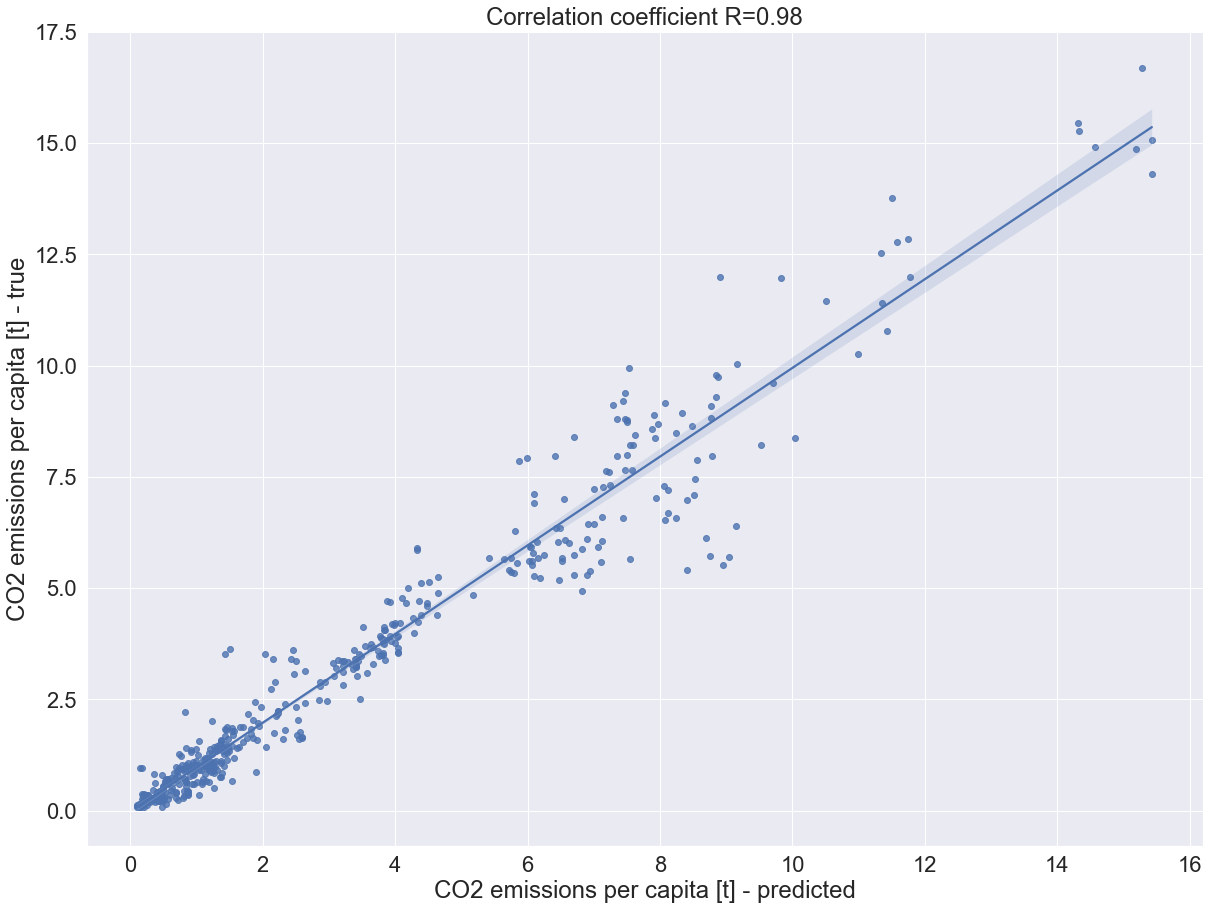

In [76]:
# plot predicted vs true values of the test subset

f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(labels_test)[0,:], fit_reg=True)
plt.xlabel("CO2 emissions per capita [t] - predicted")
plt.ylabel("CO2 emissions per capita [t] - true")
plt.title("Correlation coefficient R="+str(round(np.corrcoef(predictions,np.transpose(labels_test)[0,:])[0,1],2)))
plt.show()